## Exercise 03 : Bar charts

In [1]:
import pandas as pd
import sqlite3

database_file = "../data/checking-logs.sqlite"

* analyze only the users and not the admins
* the fontsize and the figsize remain the same
* for each hour, calculate the average number of commits on working days and on
weekends (if there were no commits in an hour, do not use it to calculate the
average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue,
17-18: 6 commits, Wed, 17-18: 7 commits
* choose a palette that you really enjoy, you do not have to replicate it from the graph
above

In [2]:
connection_obj = sqlite3.connect(database_file)

In [3]:
query = """
    SELECT timestamp as date
    FROM checker
    WHERE uid LIKE 'user_%'
"""


df = pd.read_sql(query, connection_obj, parse_dates=['date'])

df['day_of_week'] = df['date'].apply(lambda x: 'weekend' if x.day_of_week in [5,6] else 'working_day')
df['hour'] = df['date'].dt.hour
df['date_only'] = df['date'].dt.date

daily_commits = df.groupby(['day_of_week', 'date_only', 'hour']).size().reset_index(name='commits')
avg_commits = daily_commits.groupby(['day_of_week', 'hour'])['commits'].mean().unstack('day_of_week', fill_value=0)
avg_commits = avg_commits.reindex(range(24), fill_value=0)
avg_commits

day_of_week,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,0.000000
2,0.000000,0.000000
3,1.000000,2.000000
4,0.000000,0.000000
5,2.000000,7.500000
6,0.000000,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


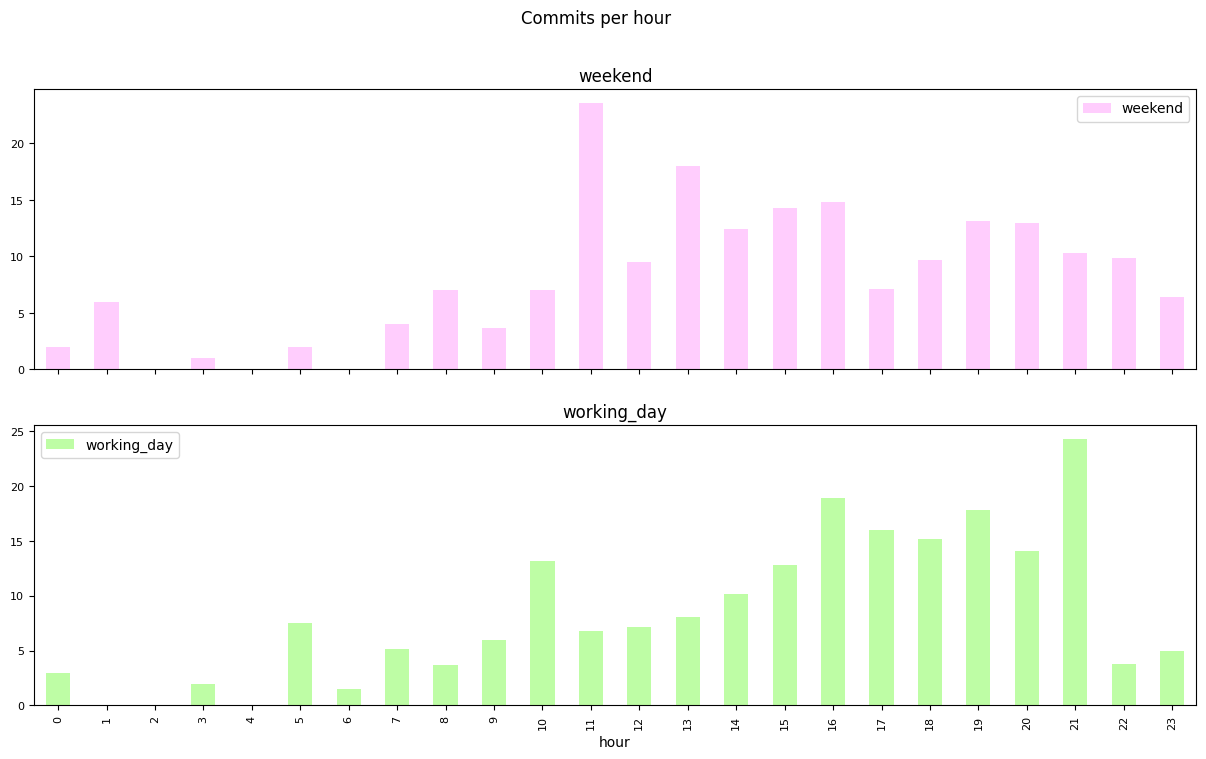

In [4]:
plot = avg_commits.plot(
    subplots=True,
    kind='bar',
    title='Commits per hour',
    layout=(2,1),
    fontsize=8,
    figsize=(15,8),
    colormap='vanimo',
    rot=90
)

In [5]:
connection_obj.close()

* at the end of your Jupyter Notebook, create a markdown cell and insert the question
  * “Is the dynamic different on working days and weekends?”, for the answer
include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.

Есть различие по динамике среднего числа коммитов в выходные и рабочие дни, так, в выходные пик числа коммитов приходится на **11 часов дня**, а в рабочие дни число коммитов идет плавно по нарастающей к вечеру и пик приходится на **21 час вечера**.

Однако максимальное среднее значение коммитов в выходные и рабочие дни почти сходятся - 23.6 в выходные и 24.3 в рабочие дни